## Question4. Can you detect cascading faliures as delays in one airport create delays in others?

In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#change to the direectory where the files are stored
os.chdir('C:\\Users\\juhyu\\OneDrive\\Desktop\\JH\\SIM\\Year2\\Programming for data science\\Coursework material\\dataverse_files')

In [3]:
# ====== create tables ======
airline2003=pd.read_csv('2003.csv.bz2', compression='bz2', low_memory=False,error_bad_lines=False,skiprows=lambda x: x%2 ==1)
airline2004=pd.read_csv('2004.csv.bz2', compression='bz2', low_memory=False,error_bad_lines=False,skiprows=lambda x: x%2 ==1)
airline2005=pd.read_csv('2005.csv.bz2', compression='bz2', low_memory=False,error_bad_lines=False,skiprows=lambda x: x%2 ==1)

C:\Users\juhyu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
frames=[airline2003,airline2004,airline2005]
df=pd.concat(frames)
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003,1,30,4,1654.0,1655,1910.0,1913,UA,1017,...,2,26,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2003,1,1,3,1033.0,1035,1625.0,1634,UA,1018,...,6,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2003,1,3,5,1031.0,1035,1640.0,1634,UA,1018,...,13,13,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2003,1,5,7,1035.0,1035,1636.0,1634,UA,1018,...,5,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2003,1,1,3,1713.0,1710,1851.0,1847,UA,1020,...,7,29,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570293,2005,12,22,4,758.0,759,1247.0,1241,DL,895,...,6,14,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3570294,2005,12,22,4,1256.0,1300,1306.0,1311,DL,897,...,6,22,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3570295,2005,12,22,4,1652.0,1655,1815.0,1837,DL,901,...,7,15,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3570296,2005,12,22,4,1507.0,1511,1641.0,1649,DL,903,...,4,29,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Getting the column names in dataframe
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
airports=pd.read_csv('airports.csv',error_bad_lines=False)
airports

C:\Users\juhyu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [7]:
#Creating total delay column to calculate the total delay 
df['totaldelay']=df['ArrDelay']+df['DepDelay']

In [8]:
#Creating a whole date column 
df['Date']=df[['Year','Month','DayofMonth']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

##### Firstly, we will use correlation matrix to investigate the correlation between DepDelay and ArrDelay to investigate the possibility of cascading failure in delays.

In [12]:
df_cor=df[['Year','Month','DayofMonth', 'DayOfWeek','DepTime','CRSDepTime','ArrTime','CRSArrTime','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','DepDelay','Distance','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]

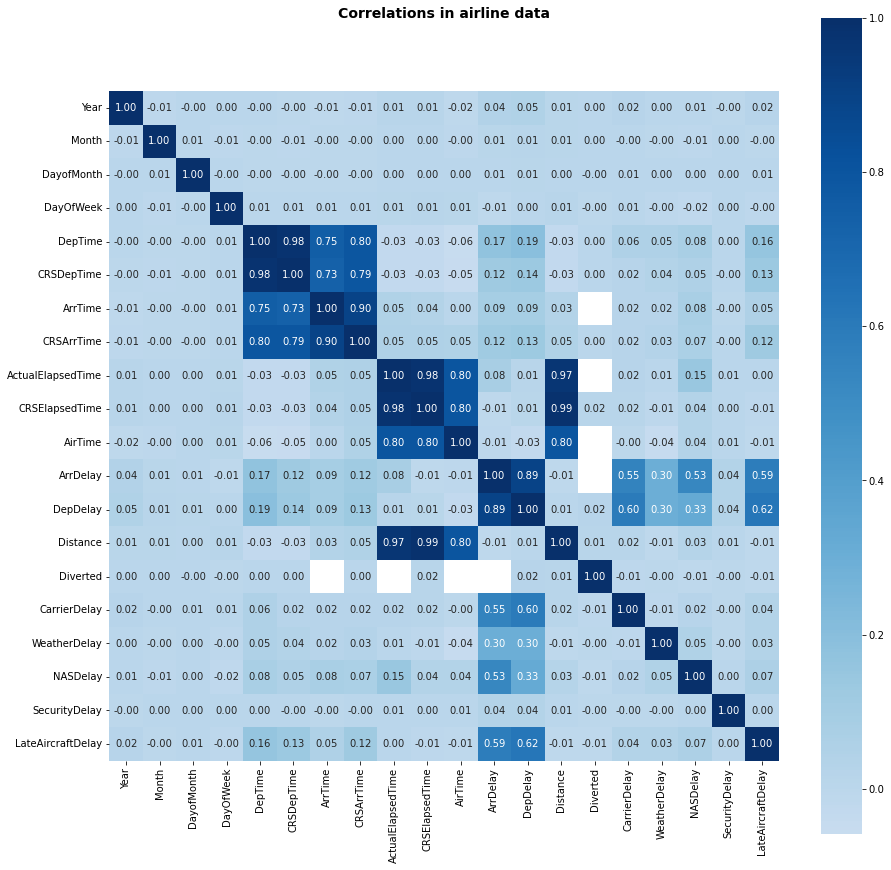

In [20]:
# correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(df_cor.corr(), square=True, annot=False, fmt='.2f', cmap='Blues', center=.3);

plt.title("Correlations in airline data", size=14, weight="bold", y=1.1)
plt.show()

##### From the correlation matrix, we can see that there is a high correlation( 0.89 ) between 'ArrDelay' and 'DepDelay', assuming there might be a cascading failure between delays.
##### Hence, we will look into dataframe to find the proportion of cascading delay in a flight within the total number of flights with delay. 

In [14]:
df4=df[['Date','DepTime', 'CRSDepTime','ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'totaldelay','Origin', 'Dest','Cancelled','LateAircraftDelay']]
df4

,Date,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,totaldelay,Origin,Dest,Cancelled,LateAircraftDelay
0,2003-1-30,1654.0,1655,1910.0,1913,UA,1017,N311UA,136.0,138,108.0,-3.0,-1.0,-4.0,ORD,MSY,0,NaN
1,2003-1-1,1033.0,1035,1625.0,1634,UA,1018,N409UA,232.0,239,215.0,-9.0,-2.0,-11.0,OAK,ORD,0,NaN
2,2003-1-3,1031.0,1035,1640.0,1634,UA,1018,N412UA,249.0,239,223.0,6.0,-4.0,2.0,OAK,ORD,0,NaN
3,2003-1-5,1035.0,1035,1636.0,1634,UA,1018,N828UA,241.0,239,227.0,2.0,0.0,2.0,OAK,ORD,0,NaN
4,2003-1-1,1713.0,1710,1851.0,1847,UA,1020,N567UA,98.0,97,62.0,4.0,3.0,7.0,IAD,BOS,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570293,2005-12-22,758.0,759,1247.0,1241,DL,895,N666DN,169.0,162,149.0,6.0,-1.0,5.0,DEN,ATL,0,0.0
3570294,2005-12-22,1256.0,1300,1306.0,1311,DL,897,N983DL,70.0,71,42.0,-5.0,-4.0,-9.0,ATL,VPS,0,0.0
3570295,2005-12-22,1652.0,1655,1815.0,1837,DL,901,N109DL,263.0,282,241.0,-22.0,-3.0,-25.0,ATL,ONT,0,0.0
3570296,2005-12-22,1507.0,1511,1641.0,1649,DL,903,N306DL,154.0,158,121.0,-8.0,-4.0,-12.0,ATL,SAT,0,0.0


In [15]:
df4

,Date,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,totaldelay,Origin,Dest,Cancelled,LateAircraftDelay
0,2003-1-30,1654.0,1655,1910.0,1913,UA,1017,N311UA,136.0,138,108.0,-3.0,-1.0,-4.0,ORD,MSY,0,NaN
1,2003-1-1,1033.0,1035,1625.0,1634,UA,1018,N409UA,232.0,239,215.0,-9.0,-2.0,-11.0,OAK,ORD,0,NaN
2,2003-1-3,1031.0,1035,1640.0,1634,UA,1018,N412UA,249.0,239,223.0,6.0,-4.0,2.0,OAK,ORD,0,NaN
3,2003-1-5,1035.0,1035,1636.0,1634,UA,1018,N828UA,241.0,239,227.0,2.0,0.0,2.0,OAK,ORD,0,NaN
4,2003-1-1,1713.0,1710,1851.0,1847,UA,1020,N567UA,98.0,97,62.0,4.0,3.0,7.0,IAD,BOS,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570293,2005-12-22,758.0,759,1247.0,1241,DL,895,N666DN,169.0,162,149.0,6.0,-1.0,5.0,DEN,ATL,0,0.0
3570294,2005-12-22,1256.0,1300,1306.0,1311,DL,897,N983DL,70.0,71,42.0,-5.0,-4.0,-9.0,ATL,VPS,0,0.0
3570295,2005-12-22,1652.0,1655,1815.0,1837,DL,901,N109DL,263.0,282,241.0,-22.0,-3.0,-25.0,ATL,ONT,0,0.0
3570296,2005-12-22,1507.0,1511,1641.0,1649,DL,903,N306DL,154.0,158,121.0,-8.0,-4.0,-12.0,ATL,SAT,0,0.0


##### We will look for evidence of delay from ATL airport. 

In [16]:
#sort the dataframe per date and departure timing
new=df4.sort_values(['Date','DepTime'],ascending=[True,True])

In [17]:
#Choose necessary columns
new=new[['Date','TailNum','CRSDepTime','DepTime','CRSArrTime','ArrTime','DepDelay','ArrDelay','totaldelay','Origin','Dest','LateAircraftDelay']]

In [18]:
#rows with flights from ATL airport on 2003-10-10 with arrival delay
new.loc[(new['Dest']=='ATL') &(new['ArrDelay']>0) & (new['LateAircraftDelay']>0) & (new['Date']=='2003-10-10')].head(7)

,Date,TailNum,CRSDepTime,DepTime,CRSArrTime,ArrTime,DepDelay,ArrDelay,totaldelay,Origin,Dest,LateAircraftDelay
2569857,2003-10-10,N105DA,720,804.0,840,943.0,44.0,63.0,107.0,JAX,ATL,44.0
2569600,2003-10-10,N140LL,845,852.0,956,1013.0,7.0,17.0,24.0,JAX,ATL,7.0
2599350,2003-10-10,N920EV,1010,1050.0,1140,1215.0,40.0,35.0,75.0,ILM,ATL,35.0
2603038,2003-10-10,N972AT,1055,1057.0,1310,1330.0,2.0,20.0,22.0,PHL,ATL,2.0
2569917,2003-10-10,N376DA,1045,1104.0,1151,1215.0,19.0,24.0,43.0,TLH,ATL,19.0
2593743,2003-10-10,N857AS,1055,1115.0,1325,1341.0,20.0,16.0,36.0,MLU,ATL,16.0
2570072,2003-10-10,N998DL,1105,1116.0,1305,1321.0,11.0,16.0,27.0,BNA,ATL,11.0


In [19]:
#rows with departure delay at ATL airport around the same timing of the same day
new.loc[(new['Origin']=='ATL') &(new['DepDelay']>0) & (new['LateAircraftDelay']>0) & (new['Date']=='2003-10-10')].head(7)

,Date,TailNum,CRSDepTime,DepTime,CRSArrTime,ArrTime,DepDelay,ArrDelay,totaldelay,Origin,Dest,LateAircraftDelay
2602872,2003-10-10,N945AT,930,935.0,1050,1112.0,5.0,22.0,27.0,ATL,DFW,5.0
2590403,2003-10-10,N826AS,910,944.0,1025,1110.0,34.0,45.0,79.0,ATL,LEX,34.0
2599228,2003-10-10,N878AS,953,1003.0,1108,1123.0,10.0,15.0,25.0,ATL,MYR,10.0
2641588,2003-10-10,N2BYAA,958,1006.0,1102,1121.0,8.0,19.0,27.0,ATL,ORD,6.0
2569585,2003-10-10,N3730B,955,1019.0,1104,1144.0,24.0,40.0,64.0,ATL,MCI,24.0
2569740,2003-10-10,N679DA,1005,1020.0,1106,1126.0,15.0,20.0,35.0,ATL,SAV,10.0
2569752,2003-10-10,N133DN,1000,1022.0,1122,1152.0,22.0,30.0,52.0,ATL,LAS,22.0


##### Arrival delay of 63 minutes for 'N105DA' flight at ATL airport caused departure delay of 34 minutes for 'N826AS' flight. Presence of late aircraft delay also proves that there was a cascading failure in delay. 

##### Hence, we can detect the cascading failure in delay. 